In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# **2.1 Build a Batch Statistical Process Control model**
1. Import the data from ’bakers yeast reference batches.xlsx’. Identify how many batches are in the data. What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)?

In [32]:
df2 = pd.read_excel('bakers_yeast_reference_batches.xlsx')
df2

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [33]:
len(df2.BatchID.unique())

16

In [34]:
df2.BatchID.unique()

array(['bb', 'cb', 'db', 'eb', 'fb', 'gb', 'hb', 'ib', 'jb', 'kb', 'lb',
       'Ma', 'Na', 'Ta', 'Va', 'Xa'], dtype=object)

In [35]:
print(df2.groupby('BatchID').Time.max())

BatchID
Ma    13.6667
Na    13.6667
Ta    13.6667
Va    13.6667
Xa    13.6667
bb    13.6667
cb    13.6667
db    13.6667
eb    13.6667
fb    13.6667
gb    13.6667
hb    13.6667
ib    13.6667
jb    13.6667
kb    13.6667
lb    13.6667
Name: Time, dtype: float64


In [36]:
print(df2.groupby('BatchID').Time.count())

BatchID
Ma    83
Na    83
Ta    83
Va    83
Xa    83
bb    83
cb    83
db    83
eb    83
fb    83
gb    83
hb    83
ib    83
jb    83
kb    83
lb    83
Name: Time, dtype: int64


In [37]:
df2_1 = df2.drop(['Unnamed: 0','Primary ID'], axis = 1)
df2_1.set_index("BatchID", inplace=True)
print(list(df2_1.columns))

['Time', 'Ethanol', 'Temperature', 'Molasses flow', 'NH3 flow', 'Air flow', 'Level', 'pH']


we have 16 batches which are 'bb', 'cb', 'db', 'eb', 'fb', 'gb', 'hb', 'ib', 'jb', 'kb', 'lb', 'Ma', 'Na', 'Ta', 'Va', 'Xa' and the duration for each batch is 13.6667 and 83 data each. And we have 8 variable to measured which are 'Time', 'Ethanol', 'Temperature', 'Molasses flow', 'NH3 flow', 'Air flow', 'Level', 'pH'

2. Plot the variables time-profiles in a 2x4 subplot. Inspect the graphs (don’t just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?

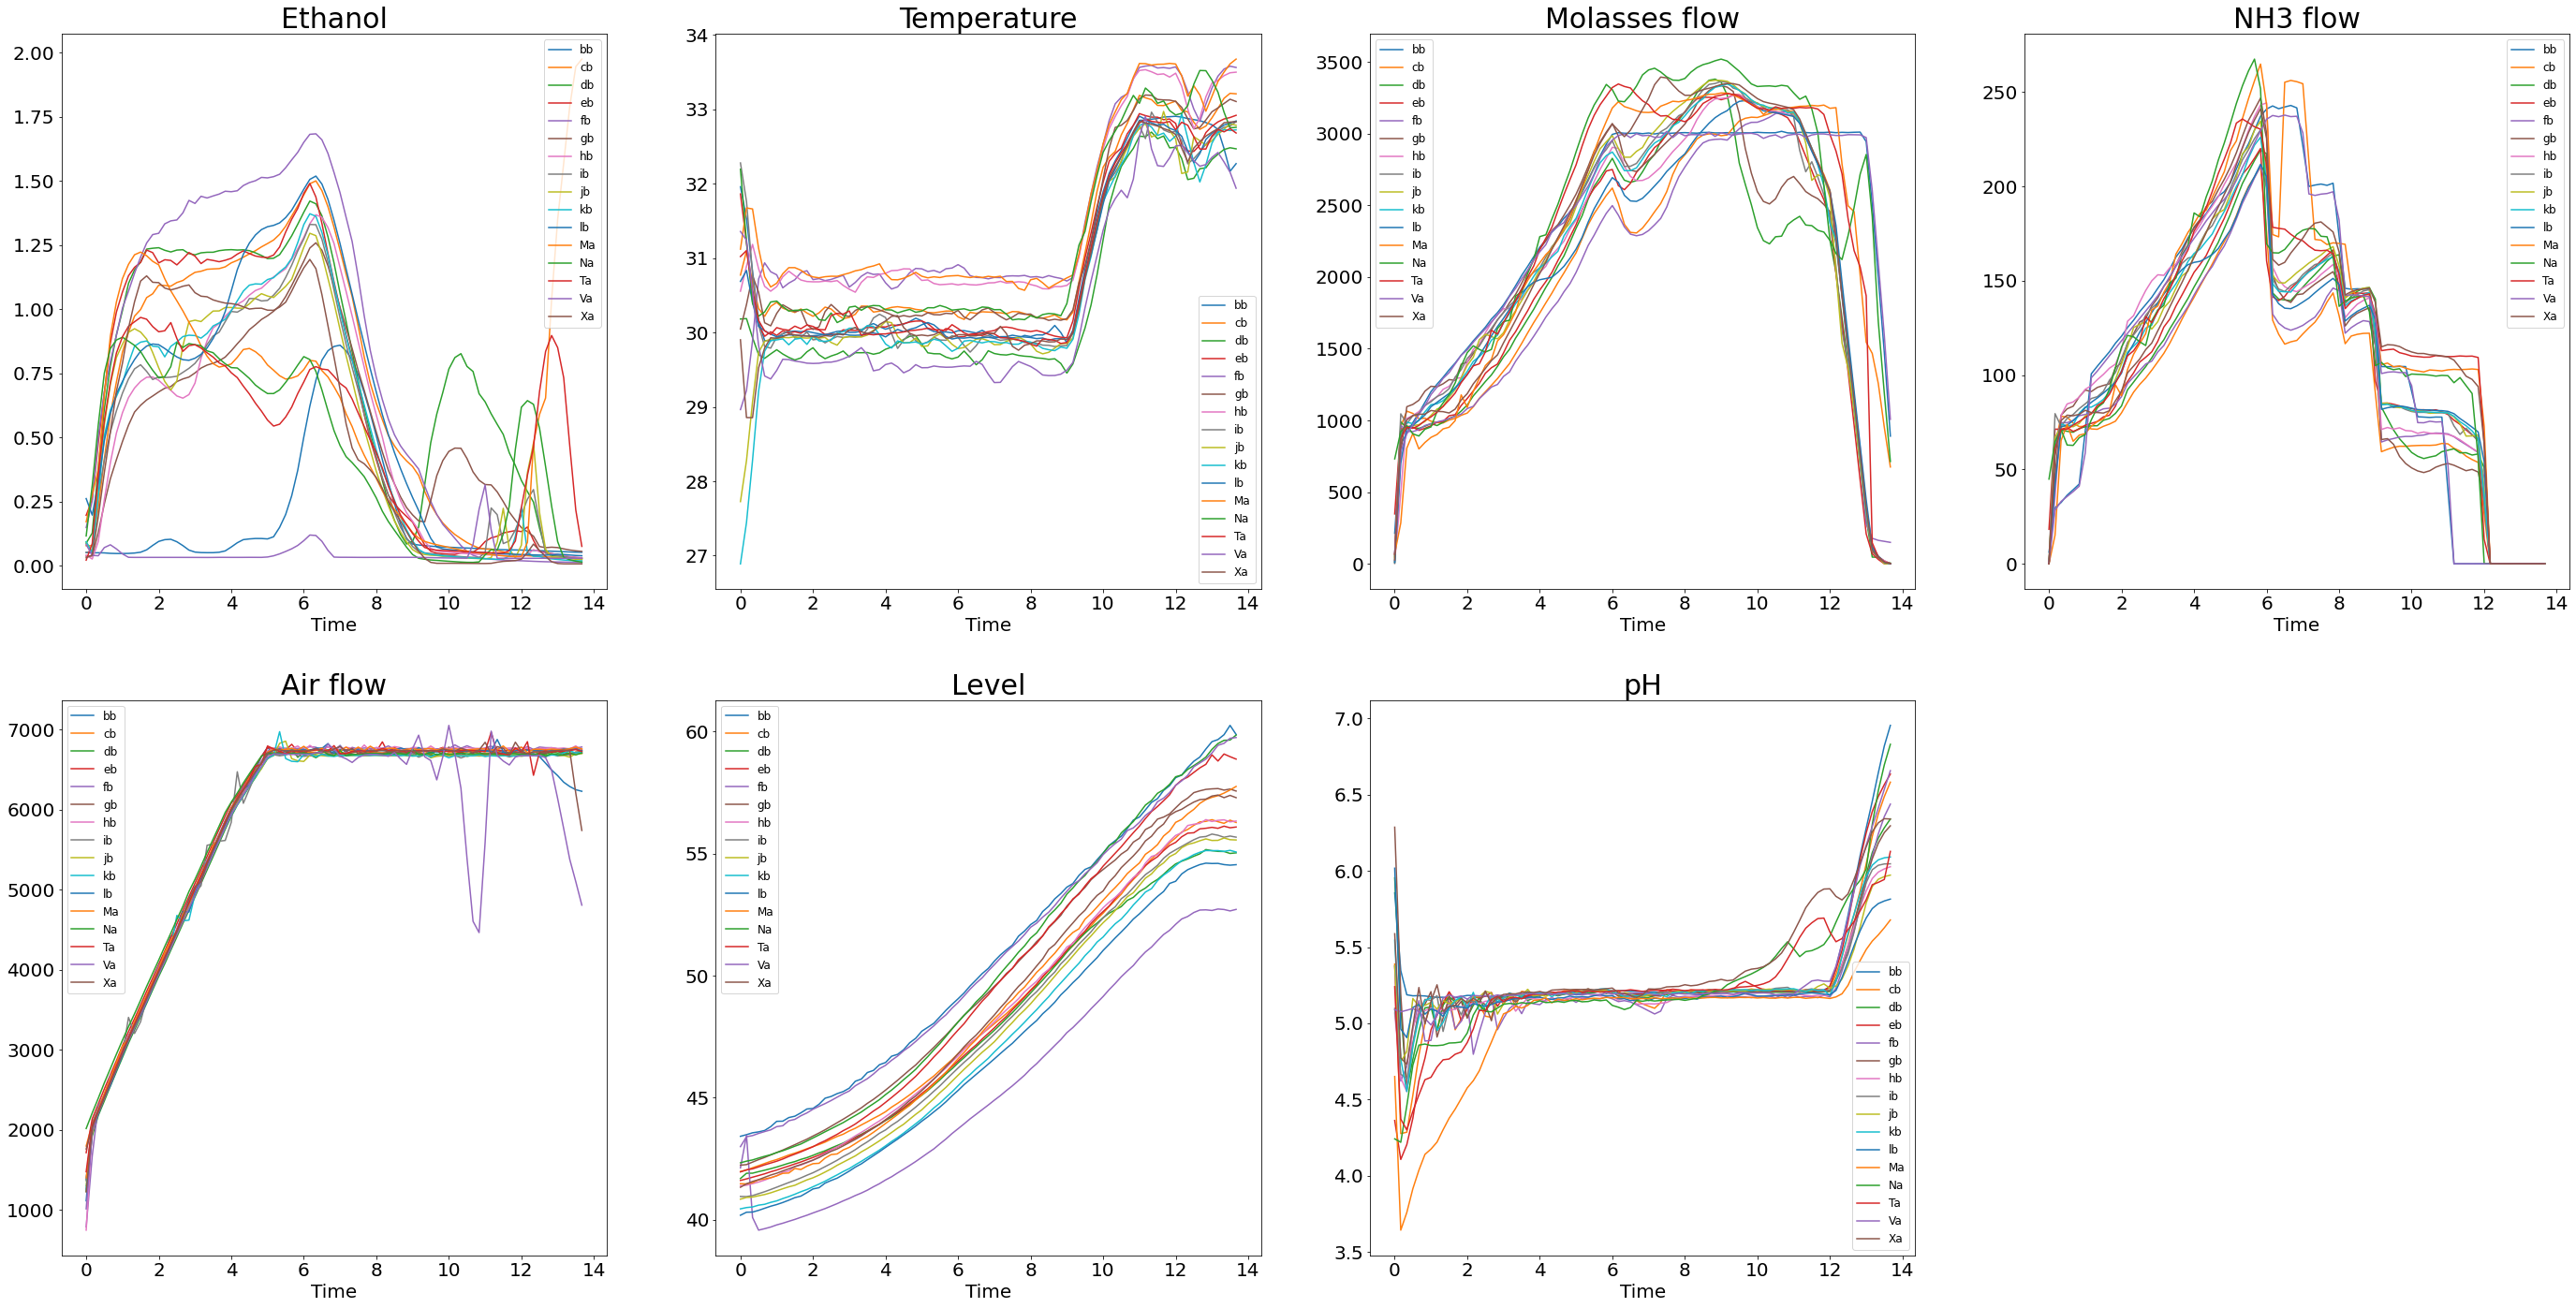

In [38]:
plt.figure(figsize=(48,24))
cols = df2_1.columns[1:]

for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  for batch in df2_1.index.unique():
    temp = df2_1[df2_1.index==batch]
    plt.plot(temp['Time'],temp[cols[i]],label=batch)
    plt.title(cols[i],fontsize=30)
    plt.xticks(fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=12)

There are two variable that have obvious outliers. First, the Va and bb from Ethanol have different trend with other batches, and Va in airflow also have a large influent in the later part. Therefore we can consider those as outliers.

For the variablility, Ethanol have higher variability since there is no a certain trend for all batches. Air flow and Level are tightly control since almost every batches have the same trend and barely no outliers.

3. Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings.

In [39]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_1)

In [40]:
pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(df2_scaled)
scores = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = df2_1.index)
loadings = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = df2_1.columns)

In [41]:
scores

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488
bb,-1.790453,2.816650,1.059588,0.979711,0.160562
bb,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446


In [42]:
loadings

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


4. In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table).

In [43]:
scores['Time'] = df2_1['Time']
scores_pivot = pd.pivot_table(scores,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
scores_pivot

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

5. Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph.

In [46]:
def myplot(batches,scores,loadings,loading_labels=None,score_labels=None):
  for i in batches:
    xt = scores['PC1'][i]
    yt = scores['PC2'][i]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    plt.plot(xt_scaled, yt_scaled)
  p = loadings
  p_scaled = MaxAbsScaler().fit_transform(p)
  n = loadings.shape[0]
  
  for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    if loading_labels is None:
        plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1), fontsize=15);
  plt.ylabel("PC{}".format(2), fontsize=15);
  plt.tick_params(labelsize=12)
  plt.axvline(0,color='black')
  plt.axhline(0,color='black')
  plt.grid()


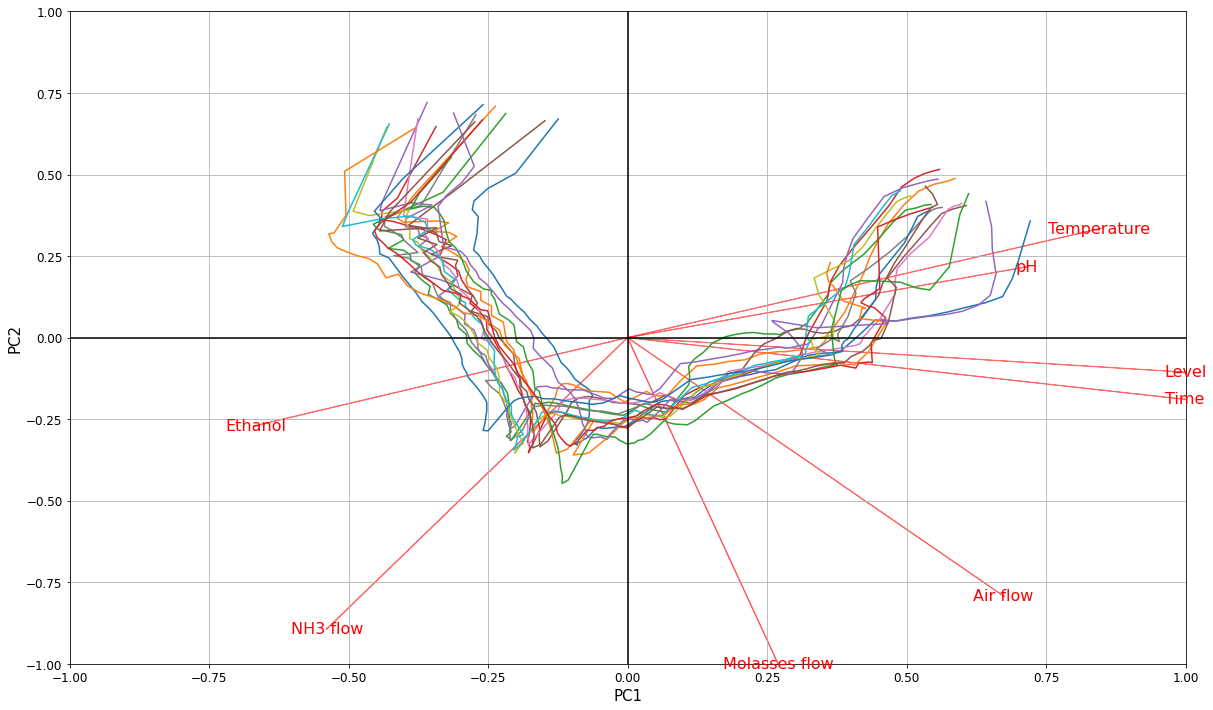

In [47]:
plt.rcParams["figure.figsize"] = [20,12]
myplot(df2_1.index.unique(),scores_pivot,loadings.iloc[:,:2],loading_labels=loadings.index,score_labels=scores.index)
plt.show()

6. Explain this graph. In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase?

From the graph we can see that the batches start from quarter four and end in quarter one and pass through second quarter and third quarter.

7. Plot the cumulative explained variance. How much variance do the first two principal components capture?

The first 2 components capture 78.47% of the variance

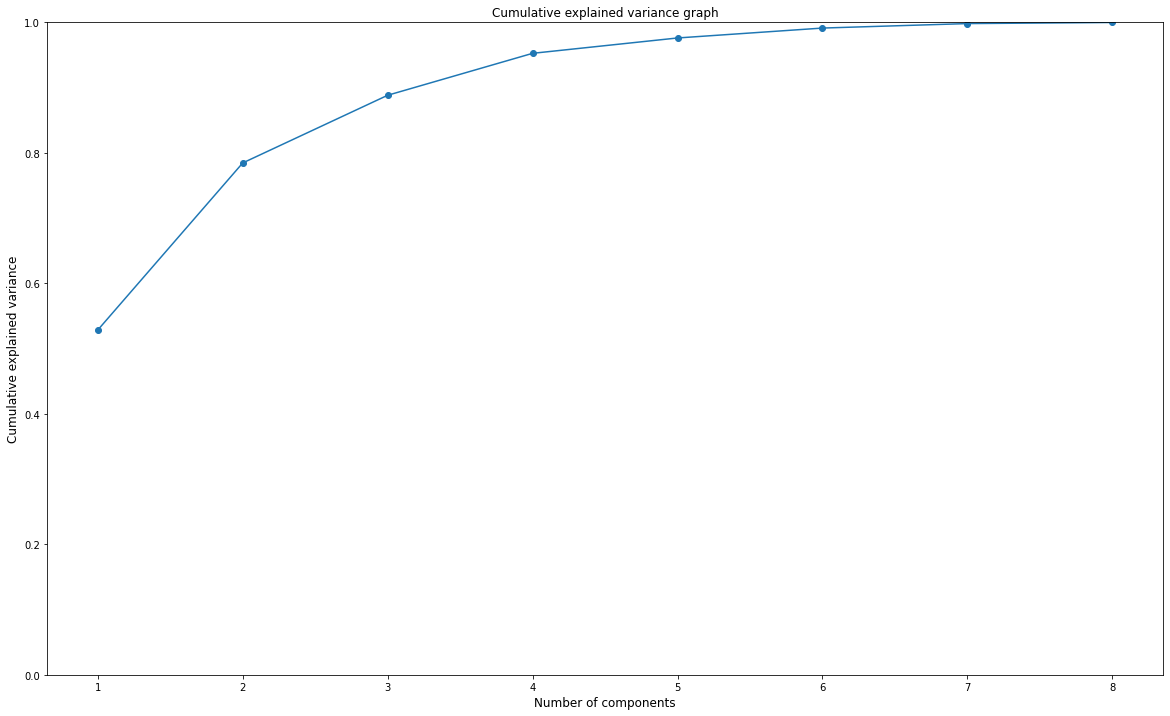

In [48]:
#plot the cumulative explained variance graph
pca8 = PCA(n_components=8, svd_solver='full')
pca8.fit(df2_scaled)
plt.plot(range(1,pca8.n_components+1), np.cumsum(pca8.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.title('Cumulative explained variance graph')
plt.tick_params(labelsize=10)
plt.ylim(0,1)
plt.show()

In [49]:
sum(pca8.explained_variance_ratio_[:2])*100

78.46737653782884

# **2.2 Use the model to monitor running batches**
1. Load the data from the file ’todays batches.xlsx’ and repeat the same procedure as in
the steps 3-4 of the previous section with the exception of the PCA modeling. Here,
instead of fit the data to the model and transform, you will only transform them with
the model object you created in the previous section

In [50]:
df2_2 = pd.read_excel('todays_batches.xlsx')
df2_2

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [51]:
df22 = df2_2.drop(['Unnamed: 0','Primary ID'], axis = 1)
df22.set_index("BatchID", inplace=True)

In [52]:
df22_scaled = scaler.transform(df22)
pca_scores = pca.transform(df22_scaled)
scores_pd = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = df22.index)
loadings = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = df22.columns)

In [53]:
scores_pd['Time'] = df22['Time']

In [54]:
scores_pivot1 = pd.pivot_table(scores_pd,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
scores_pivot1

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

2. Plot the same scores-loadings plot for the data in the batches you used to develop the
model with solid lines. Overlay the new incoming data from the two current batches
with dashed lines and two different colours to distinguish them. Also, add a legend for
the two batches so that the viewer can distinguish them.

In [55]:
def myplotQ2(batches,scores,new_scores,loadings,loading_labels=None,score_labels=None):
  for i in batches:
    xt = scores['PC1'][i]
    yt = scores['PC2'][i]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    plt.plot(xt_scaled, yt_scaled,color='grey')

  for i in ['Ya','Za']:
    xt = new_scores['PC1'][i]
    yt = new_scores['PC2'][i]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    plt.plot(xt_scaled, yt_scaled,'--',label=i)
    plt.legend()
  p = loadings
  p_scaled = MaxAbsScaler().fit_transform(p)
  n = loadings.shape[0]
  
  for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    if loading_labels is None:
        plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)

  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1), fontsize=15);
  plt.ylabel("PC{}".format(2), fontsize=15);
  plt.tick_params(labelsize=12)
  plt.axvline(0,color='black')
  plt.axhline(0,color='black')
  plt.grid()

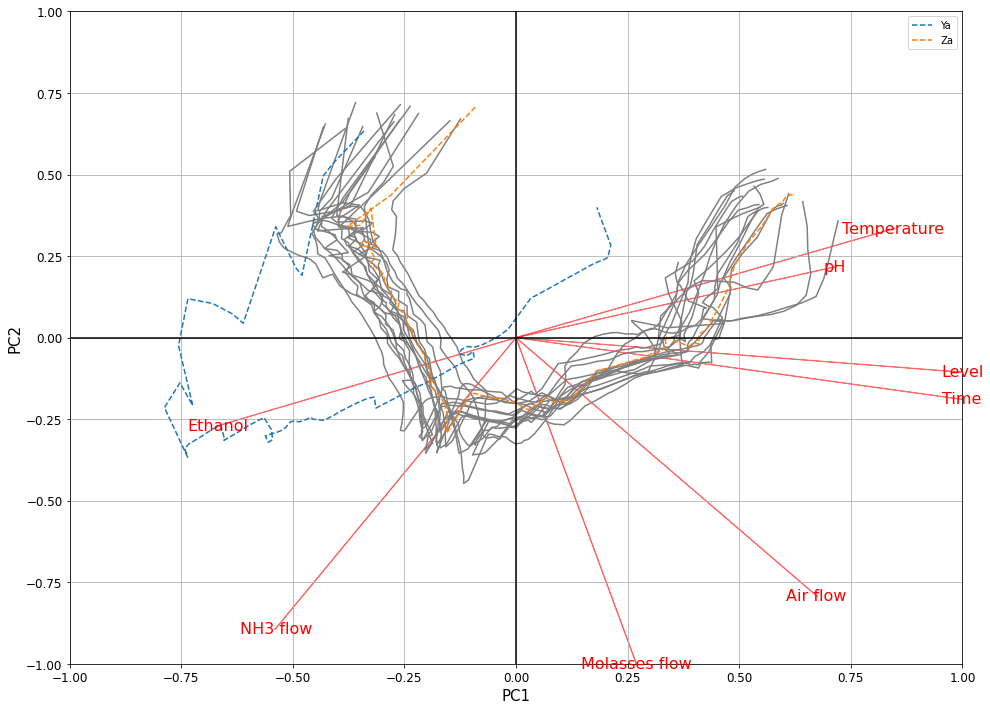

In [56]:
plt.rcParams["figure.figsize"] = [16,12]
myplotQ2(df2_1.index.unique(),scores_pivot,scores_pivot1,loadings.iloc[:,:2],loading_labels=loadings.index,score_labels=scores_pd.index)
plt.show()

3. Do the batches show behaviour similar to that of the reference ones or there are outliers
indicating potential problems?

From the plot we can clearly see that the Ya line did not followed the trend of other batch which means that it is a outliers and the Za have the similar behaviour with other batch. 

From the behaviour of Ya line we can see that it contain a high concentration of Ethanol, therefore we may conclude that Ethanol may cause the pattern become different with others.